# Machine Learning with Energy Datasets

## Exploratory Data Aanlysis

This jupyter notebook does the EDA for the energy datasets. It focusses on the energy consumption and prediction of the appliances.

# Importing Libraries

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly as ply
data = pd.read_csv('C:/Users/Komal/Desktop/Assignment 2/energydata_complete.csv')


# Renaming Variables

In [27]:
data.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)
data.head(5)

,date,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Checking for any null values within the Dataset

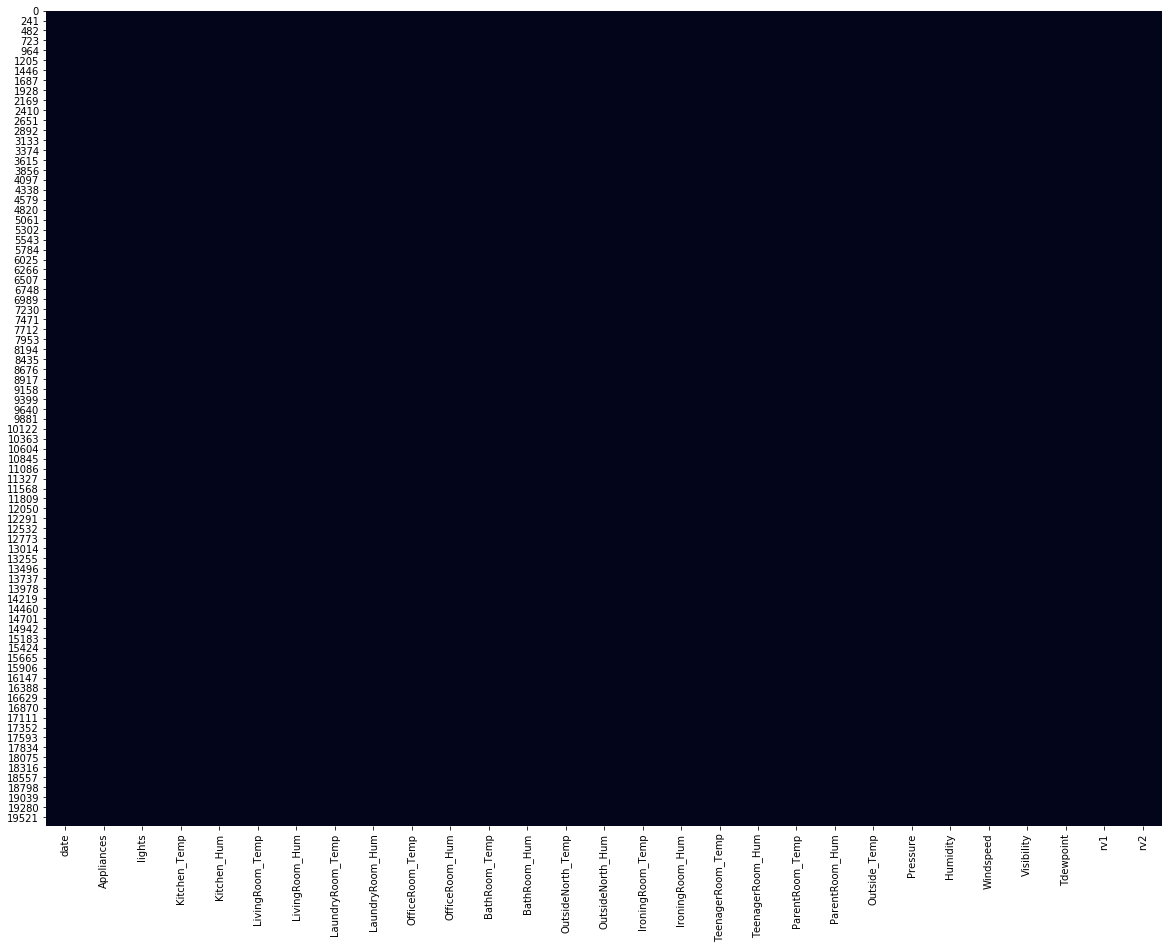

In [28]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.isnull(), cbar = False)

In [29]:
data['Energy_consumed'] = data['Appliances'] + data['lights']

In [30]:
data = data[['date','Appliances', 'lights', 'Energy_consumed', 'Kitchen_Temp', 'Kitchen_Hum',
       'LivingRoom_Temp', 'LivingRoom_Hum', 'LaundryRoom_Temp',
       'LaundryRoom_Hum', 'OfficeRoom_Temp', 'OfficeRoom_Hum', 'BathRoom_Temp',
       'BathRoom_Hum', 'OutsideNorth_Temp', 'OutsideNorth_Hum',
       'IroningRoom_Temp', 'IroningRoom_Hum', 'TeenagerRoom_Temp',
       'TeenagerRoom_Hum', 'ParentRoom_Temp', 'ParentRoom_Hum', 'Outside_Temp',
       'Pressure', 'Humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'
       ]]
data

,date,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,90,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,90,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,80,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,90,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,100,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,90,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,110,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,110,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,100,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,110,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [31]:
data.isnull().sum()

date                 0
Appliances           0
lights               0
Energy_consumed      0
Kitchen_Temp         0
Kitchen_Hum          0
LivingRoom_Temp      0
LivingRoom_Hum       0
LaundryRoom_Temp     0
LaundryRoom_Hum      0
OfficeRoom_Temp      0
OfficeRoom_Hum       0
BathRoom_Temp        0
BathRoom_Hum         0
OutsideNorth_Temp    0
OutsideNorth_Hum     0
IroningRoom_Temp     0
IroningRoom_Hum      0
TeenagerRoom_Temp    0
TeenagerRoom_Hum     0
ParentRoom_Temp      0
ParentRoom_Hum       0
Outside_Temp         0
Pressure             0
Humidity             0
Windspeed            0
Visibility           0
Tdewpoint            0
rv1                  0
rv2                  0
dtype: int64

In [32]:
data.dtypes

date                  object
Appliances             int64
lights                 int64
Energy_consumed        int64
Kitchen_Temp         float64
Kitchen_Hum          float64
LivingRoom_Temp      float64
LivingRoom_Hum       float64
LaundryRoom_Temp     float64
LaundryRoom_Hum      float64
OfficeRoom_Temp      float64
OfficeRoom_Hum       float64
BathRoom_Temp        float64
BathRoom_Hum         float64
OutsideNorth_Temp    float64
OutsideNorth_Hum     float64
IroningRoom_Temp     float64
IroningRoom_Hum      float64
TeenagerRoom_Temp    float64
TeenagerRoom_Hum     float64
ParentRoom_Temp      float64
ParentRoom_Hum       float64
Outside_Temp         float64
Pressure             float64
Humidity             float64
Windspeed            float64
Visibility           float64
Tdewpoint            float64
rv1                  float64
rv2                  float64
dtype: object

## Energy consumption prediction

In order to predict the energy consumption we are extracting the year, month, weekday, hours, minutes and seconds from the data variable.

In [33]:
# Converting Date object to Datetime object
data['date']=pd.to_datetime(data['date'])

# Adding day of week column
data['Day_of_week']=data['date'].dt.weekday_name

# Adding month number column
data['Month_Number']=data['date'].dt.month

# Adding Time column
data['Time']=data['date'].dt.time

# Adding month number column
data['Date_number']=data['date'].dt.date

# Geting the weekday number
data["Weekday_number"]=data['date'].dt.weekday

type(data["Day_of_week"])

#Adding Weekday column
if str(data.Day_of_week)=="Sunday" or str(data.Day_of_week)=="Saturday":
    data["Weekday_Column"]=1
else:
    data["Weekday_Column"]=0

In [9]:
data

,date,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,Visibility,Tdewpoint,rv1,rv2,Day_of_week,Month_Number,Time,Date_number,Weekday_number,Weekday_Column
0,2016-01-11 17:00:00,60,30,90,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,63.000000,5.300000,13.275433,13.275433,Monday,1,17:00:00,2016-01-11,0,0
1,2016-01-11 17:10:00,60,30,90,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,59.166667,5.200000,18.606195,18.606195,Monday,1,17:10:00,2016-01-11,0,0
2,2016-01-11 17:20:00,50,30,80,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,55.333333,5.100000,28.642668,28.642668,Monday,1,17:20:00,2016-01-11,0,0
3,2016-01-11 17:30:00,50,40,90,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,51.500000,5.000000,45.410389,45.410389,Monday,1,17:30:00,2016-01-11,0,0
4,2016-01-11 17:40:00,60,40,100,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,47.666667,4.900000,10.084097,10.084097,Monday,1,17:40:00,2016-01-11,0,0
5,2016-01-11 17:50:00,50,40,90,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,...,43.833333,4.800000,44.919484,44.919484,Monday,1,17:50:00,2016-01-11,0,0
6,2016-01-11 18:00:00,60,50,110,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,40.000000,4.700000,47.233763,47.233763,Monday,1,18:00:00,2016-01-11,0,0
7,2016-01-11 18:10:00,60,50,110,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,...,40.000000,4.683333,33.039890,33.039890,Monday,1,18:10:00,2016-01-11,0,0
8,2016-01-11 18:20:00,60,40,100,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,...,40.000000,4.666667,31.455702,31.455702,Monday,1,18:20:00,2016-01-11,0,0
9,2016-01-11 18:30:00,70,40,110,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,...,40.000000,4.650000,3.089314,3.089314,Monday,1,18:30:00,2016-01-11,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 36 columns):
date                 19735 non-null datetime64[ns]
Appliances           19735 non-null int64
lights               19735 non-null int64
Energy_consumed      19735 non-null int64
Kitchen_Temp         19735 non-null float64
Kitchen_Hum          19735 non-null float64
LivingRoom_Temp      19735 non-null float64
LivingRoom_Hum       19735 non-null float64
LaundryRoom_Temp     19735 non-null float64
LaundryRoom_Hum      19735 non-null float64
OfficeRoom_Temp      19735 non-null float64
OfficeRoom_Hum       19735 non-null float64
BathRoom_Temp        19735 non-null float64
BathRoom_Hum         19735 non-null float64
OutsideNorth_Temp    19735 non-null float64
OutsideNorth_Hum     19735 non-null float64
IroningRoom_Temp     19735 non-null float64
IroningRoom_Hum      19735 non-null float64
TeenagerRoom_Temp    19735 non-null float64
TeenagerRoom_Hum     19735 non-null float64
ParentRoom

In [11]:
data.describe()

,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month_Number,Weekday_number,Weekday_Column
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0
mean,97.694958,3.801875,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,0.0
std,102.524891,7.935988,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,0.0
min,10.000000,0.000000,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,0.0
25%,50.000000,0.000000,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,0.0
50%,60.000000,0.000000,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,0.0
75%,100.000000,0.000000,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,0.0
max,1080.000000,70.000000,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000,0.0


count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: Energy_consumed, dtype: float64


C:\Users\Komal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



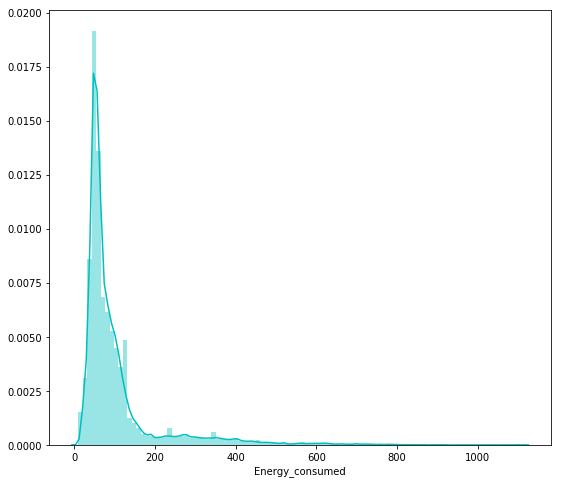

In [12]:
print(data['Energy_consumed'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Energy_consumed'], color='c', bins=100)

In [13]:

# Extracting only numerical values
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month_Number,Weekday_number,Weekday_Column
0,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,0
1,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,0
2,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,0
3,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,0
4,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,0


In [14]:
def weekend_weekday(weekday):
    if energy_data['weekday'] == "Saturday" or energy_data['weekday'] == "Sunday" :
        value = Weekend
    else:
        value = Weekday
    return value

In [15]:
data.corr(method='pearson', min_periods=1)

,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month_Number,Weekday_number,Weekday_Column
Appliances,1.000000,0.197278,0.997218,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,...,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,-0.011606,0.003060,NaN
lights,0.197278,1.000000,0.269799,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,...,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,-0.179452,-0.099828,NaN
Energy_consumed,0.997218,0.269799,1.000000,0.052673,0.092634,0.117511,-0.055513,0.076143,0.045618,0.038891,...,-0.035069,-0.144363,0.090156,0.001750,0.012318,-0.010907,-0.010907,-0.025043,-0.004584,NaN
Kitchen_Temp,0.055447,-0.023528,0.052673,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,...,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.706305,0.001381,NaN
Kitchen_Hum,0.086031,0.106968,0.092634,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,...,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.094048,-0.053782,NaN
LivingRoom_Temp,0.120073,-0.005622,0.117511,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,...,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.533479,0.000602,NaN
LivingRoom_Hum,-0.060465,0.050985,-0.055513,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,...,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.097914,-0.044249,NaN
LaundryRoom_Temp,0.085060,-0.097393,0.076143,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,...,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.790365,-0.017514,NaN
LaundryRoom_Hum,0.036292,0.131161,0.045618,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,...,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.414359,-0.035182,NaN
OfficeRoom_Temp,0.040281,-0.008859,0.038891,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,...,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.789168,-0.091006,NaN


## Correlation matrix

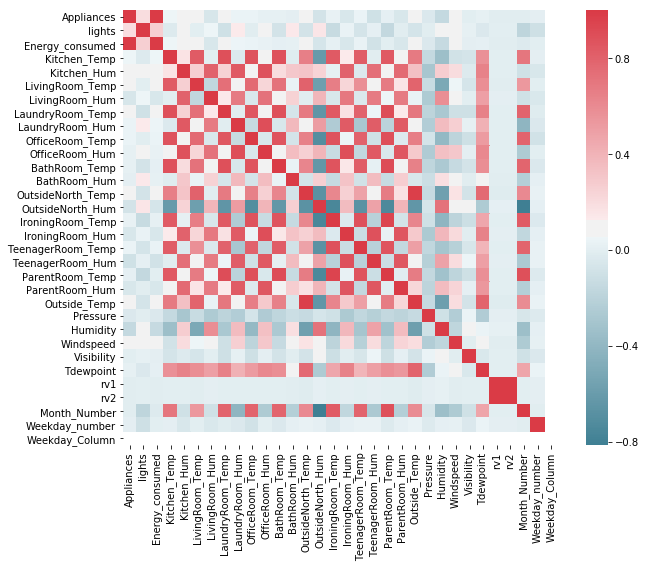

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig("correlation.png")

In [17]:

# Finding correlated values with Energy_consumed only
df_num_corr =df_num.corr()['Energy_consumed'][0:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with SalePrice:
Energy_consumed      1.000000
Appliances           0.997218
lights               0.269799
LivingRoom_Temp      0.117511
OutsideNorth_Temp    0.109538
Humidity            -0.144363
Name: Energy_consumed, dtype: float64


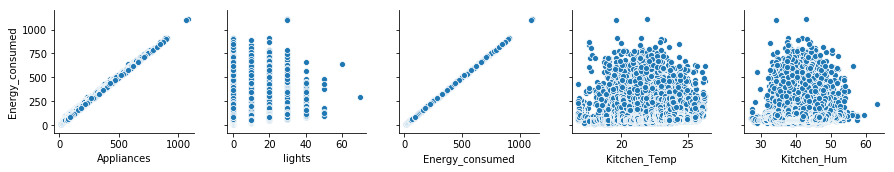

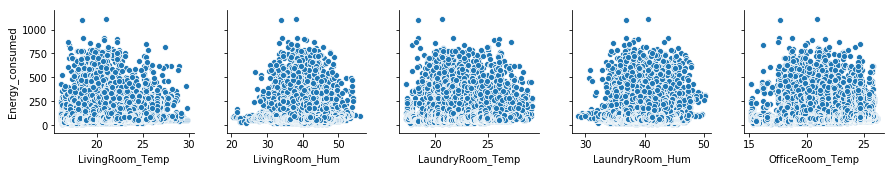

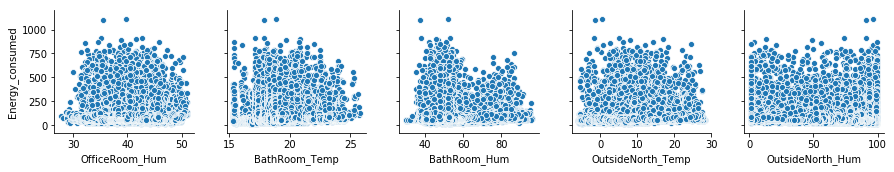

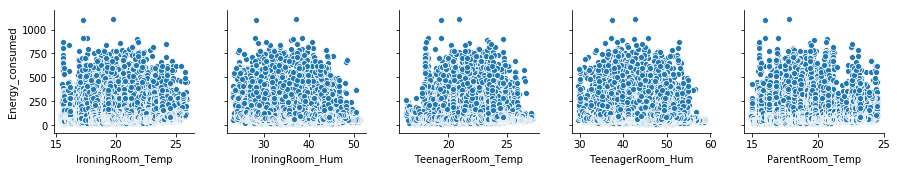

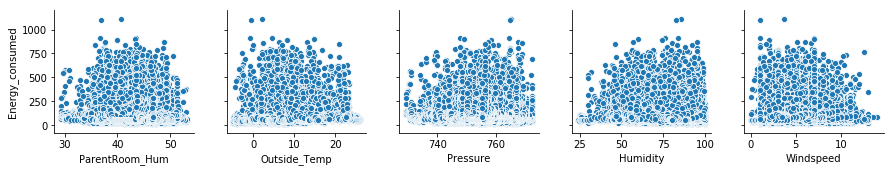

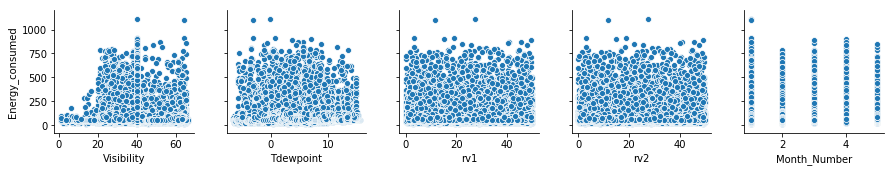

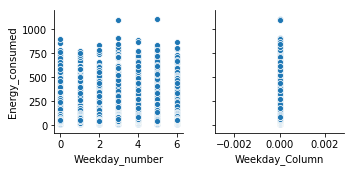

In [18]:
# Scatterplot w.r.t Energy_consumed
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Energy_consumed'])

## Daily energy consumption

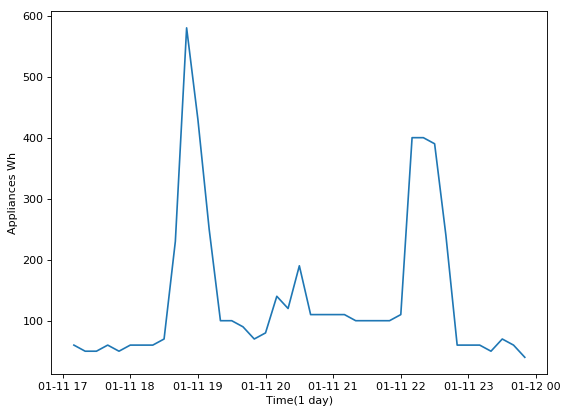

In [19]:
fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
ax.plot(data.date[1:42],data.Appliances[1:42])
ax.set_xlabel('Time(1 day)')
ax.set_ylabel('Appliances Wh')
plt.savefig("appliance_daily.png")

## Weekday wise energy consumption

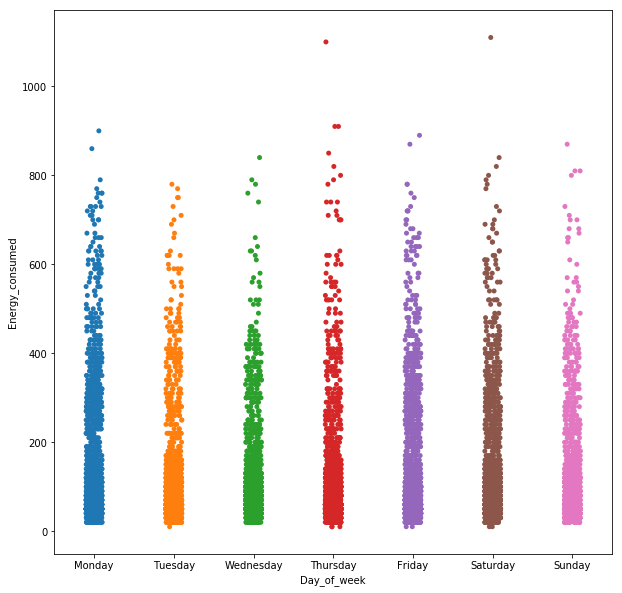

In [21]:

# Strip plot to check which day there was more usage of energy
f, ax = plt.subplots(figsize=(10,10))
ax = sns.stripplot(x="Day_of_week", y="Energy_consumed" , data= data)

## Weekwise energy consumption

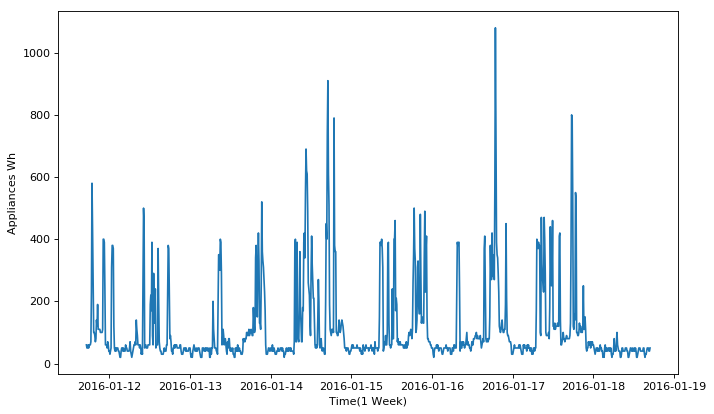

In [22]:
fig=plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
ax.plot(data.date[1:1008], data.Appliances[1:1008])
ax.set_xlabel('Time(1 Week)')
ax.set_ylabel('Appliances Wh')
plt.savefig("appliance_1week.png")

## Total Appliances energy consumption

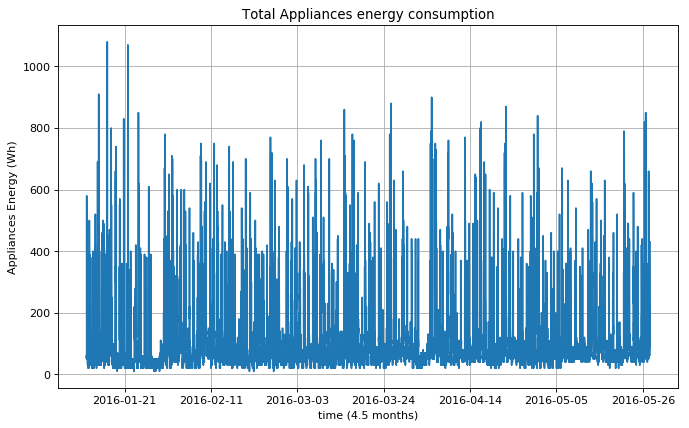

In [23]:
%matplotlib inline
fig=plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
ax.plot(data['date'],data['Appliances'])
ax.set(xlabel='time (4.5 months)', ylabel='Appliances Energy (Wh)',
       title='Total Appliances energy consumption')
ax.grid()
fig.savefig("appliance_graph.png")
plt.show()

## Frequency of appliances

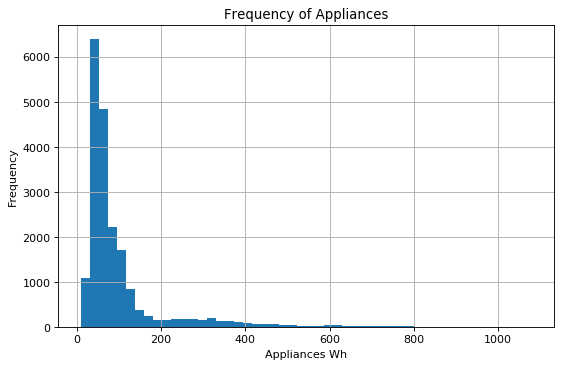

In [24]:
plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
data['Appliances'].hist(bins=50)
plt.xlabel("Appliances Wh")
plt.title("Frequency of Appliances")
plt.ylabel("Frequency")
fig.savefig("frequency_application.png")

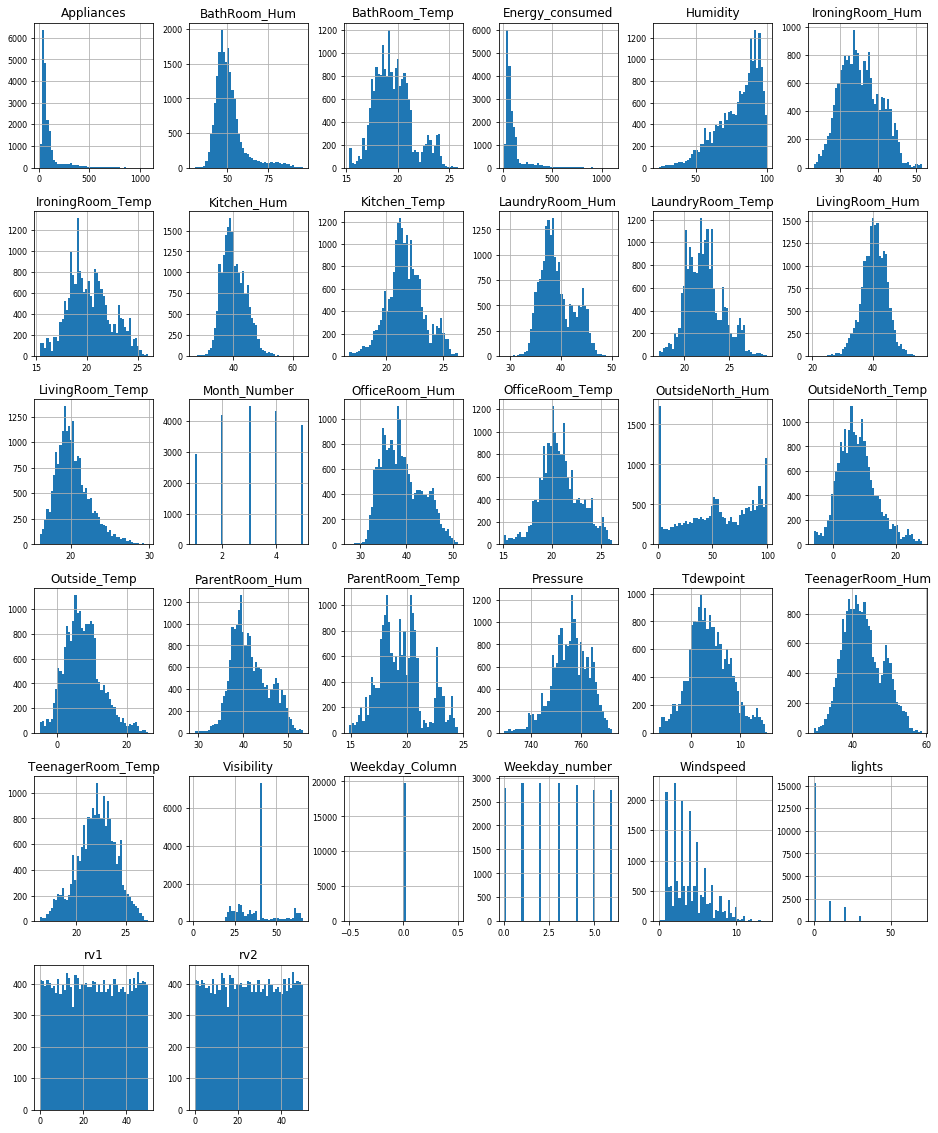

In [25]:
# Plotting histogram of numerical features
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # avoid having the matplotlib verbose informations